In [1]:
from os.path import join

import cv2
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from dataloader import get_noisy_image
from model import build_model

from skimage.metrics import peak_signal_noise_ratio as PSNR

In [9]:
test_tensor = torch.randn((1, 1, 224, 224))

In [10]:
concatenated = torch.cat((test_tensor, test_tensor, test_tensor), 1)

In [11]:
concatenated.shape

torch.Size([1, 3, 224, 224])

In [2]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [9]:
model_name = "tiny"

model = build_model(model_name)
model.classifier = nn.Linear(model.classifier.in_features, 300)

In [10]:
path = "results/"

In [11]:
model.load_state_dict(torch.load(join(path, "model.pth")))
model.eval()

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0): SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
        

In [57]:
dataset_path = "/Users/irina/Documents/Etudes/DS/datasets/Classification/300_birds/test/"

transform = transformations(224)

image = cv2.imread(join(dataset_path, "ANHINGA/5.jpg"))
image = transform(image).unsqueeze(0)

In [58]:
preds = model(image).logits[0]

In [59]:
preds.argmax(-1)

tensor(11)

In [4]:
from transformers import AutoImageProcessor, Swinv2ForMaskedImageModeling
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = Swinv2ForMaskedImageModeling.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

num_patches = (model.config.image_size // model.config.patch_size) ** 2
pixel_values = image_processor(images=image, return_tensors="pt").pixel_values
# create random boolean mask of shape (batch_size, num_patches)
bool_masked_pos = torch.randint(low=0, high=2, size=(1, num_patches)).bool()

outputs = model(pixel_values, bool_masked_pos=bool_masked_pos)
loss, reconstructed_pixel_values = outputs.loss, outputs.logits
list(reconstructed_pixel_values.shape)

Downloading:   0%|          | 0.00/255 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
You are using a model of type swin to instantiate a model of type swinv2. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing Swinv2ForMaskedImageModeling: ['swin.encoder.layers.0.blocks.0.output.dense.weight', 'swin.encoder.layers.2.blocks.0.layernorm_after.weight', 'swin.encoder.layers.0.blocks.1.layernorm_before.bias', 'swin.encoder.layers.2.blocks.3.attention.self.value.weight', 'swin.encoder.layers.2.blocks.0.attention.self.query.weight', 'swin.encoder.layers.2.blocks.4.attention.self.query.bias', 'swin.encoder.layers.2.blocks.2.attention.self.value.bias', 'swin.encoder.layers.1.blocks.1.output.dense.weight', 'swin.encoder.layers.1.blocks.0.attention.output.dense.bias', 'swin.en

[1, 3, 224, 224]

In [5]:
model

Swinv2ForMaskedImageModeling(
  (swinv2): Swinv2Model(
    (embeddings): Swinv2Embeddings(
      (patch_embeddings): Swinv2PatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Swinv2Encoder(
      (layers): ModuleList(
        (0): Swinv2Stage(
          (blocks): ModuleList(
            (0): Swinv2Layer(
              (attention): Swinv2Attention(
                (self): Swinv2SelfAttention(
                  (continuous_position_bias_mlp): Sequential(
                    (0): Linear(in_features=2, out_features=512, bias=True)
                    (1): ReLU(inplace=True)
                    (2): Linear(in_features=512, out_features=3, bias=False)
                  )
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias

In [16]:
print(model)

Swinv2ForMaskedImageModeling(
  (swinv2): Swinv2Model(
    (embeddings): Swinv2Embeddings(
      (patch_embeddings): Swinv2PatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): Swinv2Encoder(
      (layers): ModuleList(
        (0): Swinv2Stage(
          (blocks): ModuleList(
            (0): Swinv2Layer(
              (attention): Swinv2Attention(
                (self): Swinv2SelfAttention(
                  (continuous_position_bias_mlp): Sequential(
                    (0): Linear(in_features=2, out_features=512, bias=True)
                    (1): ReLU(inplace=True)
                    (2): Linear(in_features=512, out_features=3, bias=False)
                  )
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias

In [25]:
x = torch.randn((1, 3, 224, 224))

outputs = model.swinv2(x)

In [26]:
print(outputs.last_hidden_state.shape)

torch.Size([1, 49, 768])


In [6]:
dataset_path = "data/"

transform = transformations(224)

image = cv2.imread(join(dataset_path, "DSC00213.jpg"))
image= transform(image).unsqueeze(0)
image = image
noisy_image = get_noisy_image(image)
preds = model(noisy_image)
target = torch.clone(image)

In [7]:
def imshow(pred, target, noisy_img, ax=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots(1, 3, figsize=(20,20))
    pred = pred.numpy().transpose((1, 2, 0))
    noisy_img = noisy_img.numpy().transpose((1, 2, 0))
    target = target.numpy().transpose((1, 2, 0))

    psnr_noisy = PSNR(target, noisy_img)
    psnr_pred = PSNR(target, pred)

    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)
    target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

    ax[0].imshow(target)
    ax[0].set_title("Original image")
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].tick_params(axis='both', length=0)
    ax[0].set_xticklabels('')
    ax[0].set_yticklabels('')

    ax[1].imshow(noisy_img)
    ax[1].set_title("Noisy image")
    ax[1].set_xlabel(f'PSNR : {psnr_noisy:.02f}')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].tick_params(axis='both', length=0)
    ax[1].set_xticklabels('')
    ax[1].set_yticklabels('')

    ax[2].imshow(pred)
    ax[2].set_title("Predicted image")
    ax[2].set_xlabel(f'PSNR : {psnr_pred:.02f}')
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)
    ax[2].spines['left'].set_visible(False)
    ax[2].spines['bottom'].set_visible(False)
    ax[2].tick_params(axis='both', length=0)
    ax[2].set_xticklabels('')
    ax[2].set_yticklabels('')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


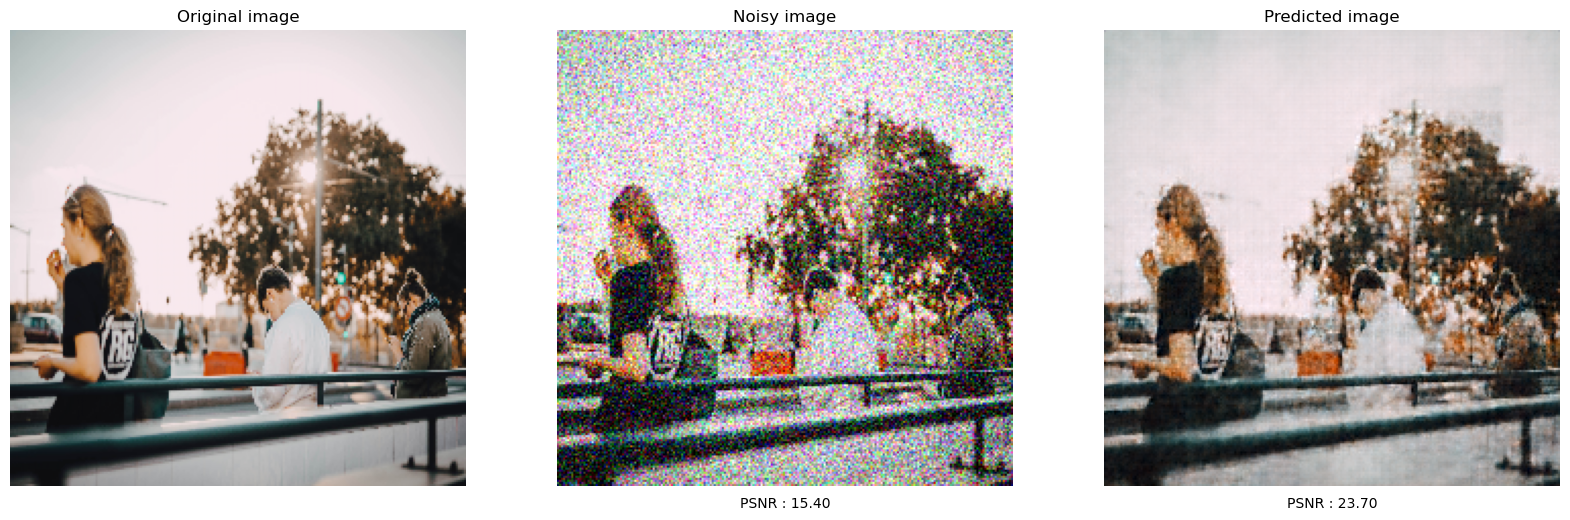

In [8]:
imshow(preds[0].detach(), target[0].detach(), noisy_image[0].detach())